
**1. What is a Decision Tree, and how does it work**

A **Decision Tree** is a supervised machine learning algorithm used for **classification** and **regression** tasks. It mimics human decision-making by splitting the data into branches based on feature values.

* The model starts at the **root node**, examines a feature, and splits the data into subsets.
* Each **internal node** represents a decision based on a feature.
* Each **leaf node** holds the final outcome (a class label or a numerical value).

The tree splits data recursively to maximize homogeneity in each branch using a criterion like **Gini impurity** or **Information Gain**.

---

**2. What are impurity measures in Decision Trees**
**Impurity measures** quantify how mixed or impure the class distribution is within a node. They guide the splitting of nodes in a tree. The most common impurity measures are:

* **Gini Impurity**: Measures the probability of incorrect classification of a randomly chosen element.
* **Entropy**: Measures the level of disorder or uncertainty.
* **Classification Error** (less common): Proportion of misclassified samples.

A lower impurity indicates a more homogenous group.

---

**3. What is the mathematical formula for Gini Impurity**
The **Gini Impurity (G)** for a node is:

$$
G = 1 - \sum_{i=1}^{n} p_i^2
$$

Where:

* $p_i$ = Probability of class $i$ at the node
* $n$ = Number of classes

Gini Impurity ranges between 0 (pure node) and up to 0.5 for a binary classification with equal probabilities.

---

**4. What is the mathematical formula for Entropy**
The **Entropy (H)** for a node is:

$$
H = - \sum_{i=1}^{n} p_i \log_2 p_i
$$

Where:

* $p_i$ = Probability of class $i$
* $n$ = Number of classes

Entropy is 0 when the node is pure and reaches its maximum when classes are uniformly distributed.

---

**5. What is Information Gain, and how is it used in Decision Trees**
**Information Gain (IG)** is the reduction in impurity (Entropy or Gini) after a dataset is split on a feature. It's used to decide which feature to split on at each step in the tree.

$$
IG = H(parent) - \sum_{i=1}^{k} \frac{N_i}{N} H(child_i)
$$

Where:

* $H$ = Entropy (or other impurity measure)
* $N$ = Total number of instances
* $N_i$ = Number of instances in child $i$

The feature with the highest Information Gain is selected for splitting.

---

**6. What is the difference between Gini Impurity and Entropy**

| Feature        | Gini Impurity                                      | Entropy                          |
| -------------- | -------------------------------------------------- | -------------------------------- |
| Formula        | $1 - \sum p_i^2$                                   | $-\sum p_i \log_2 p_i$           |
| Interpretation | Measures misclassification rate                    | Measures disorder/uncertainty    |
| Speed          | Faster to compute                                  | Slightly slower due to logarithm |
| Preference     | Used in CART (Classification and Regression Trees) | Used in ID3, C4.5 algorithms     |

Both aim to reduce impurity, but their calculations and scaling differ.

---

**7. What is the mathematical explanation behind Decision Trees**
A Decision Tree builds a model in the form of a **tree structure**:

1. For each node:

   * Calculate the impurity (Gini/Entropy) before splitting.
   * For each feature, calculate the impurity of its splits.
   * Choose the feature that gives the **maximum reduction in impurity** (i.e., maximum gain).
2. Repeat recursively until:

   * The node is pure, or
   * A stopping criterion is met (e.g., minimum samples, max depth)

It uses **recursive binary splitting** (for most implementations like CART).

---

**8. What is Pre-Pruning in Decision Trees**
**Pre-Pruning** (also called early stopping) involves **halting the tree growth early**, before it perfectly classifies the training data.

Methods:

* Set a **maximum depth**.
* Require a **minimum number of samples per node**.
* Set a threshold on **impurity reduction**.

Purpose: Avoid overfitting by stopping the tree from becoming too complex.

---

**9. What is Post-Pruning in Decision Trees**
**Post-Pruning** allows the Decision Tree to fully grow, then **removes unnecessary branches** that do not contribute to generalization.

Steps:

* Grow the full tree.
* Evaluate subtrees using a validation set or cross-validation.
* Prune branches that reduce performance.

It simplifies the tree **after** training to reduce overfitting.

---

**10. What is the difference between Pre-Pruning and Post-Pruning**

| Feature    | Pre-Pruning                           | Post-Pruning                              |
| ---------- | ------------------------------------- | ----------------------------------------- |
| Timing     | Stops tree growth during training     | Trims tree after full growth              |
| Simplicity | Faster, less complex trees            | More accurate but computationally heavy   |
| Risk       | Might stop early, missing good splits | Grows complex tree first, then simplifies |
| Control    | Uses constraints like max depth       | Uses validation set to prune              |

---

**11. What is a Decision Tree Regressor**
A **Decision Tree Regressor** is a variant of Decision Tree used for **regression tasks** (predicting continuous outputs).

* It splits the data like in classification trees but uses **Mean Squared Error (MSE)** or **Mean Absolute Error (MAE)** as the splitting criterion.
* At each leaf, it predicts the **mean** of the target values in that region.

---

**12. What are the advantages and disadvantages of Decision Trees**

**Advantages:**

* Easy to understand and interpret.
* Requires little data preprocessing.
* Can handle both numerical and categorical data.
* Works well with nonlinear relationships.

**Disadvantages:**

* Prone to overfitting.
* Can be unstable with small variations in data.
* Biased towards features with more levels (without correction).
* Not good at extrapolation in regression tasks.

---

**13. How does a Decision Tree handle missing values**
Decision Trees handle missing values using:

* **Surrogate splits**: Alternative features used when the primary split feature is missing.
* **Imputation**: Filling missing values using median/mode before training.
* **Soft splits** (in some libraries): Probabilistic routing based on other samples.

Not all implementations handle missing values natively; some require preprocessing.

---

**14. How does a Decision Tree handle categorical features**
Decision Trees can natively handle **categorical features** by:

* Creating a split for each category.
* Grouping categories based on impurity measures (especially when there are many levels).

Some implementations (like `sklearn`) require **one-hot encoding** unless using specialized methods (like LightGBM or CatBoost).

---

**15. What are some real-world applications of Decision Trees?**

* **Medical Diagnosis**: Predicting diseases based on symptoms.
* **Loan Approval**: Credit scoring and risk analysis.
* **Customer Segmentation**: Based on behavior and demographics.
* **Fraud Detection**: Identifying unusual transaction patterns.
* **Manufacturing**: Predicting equipment failures.
* **Marketing**: Recommending products based on user attributes.
* **HR Analytics**: Predicting employee attrition or performance.




In [ ]:
# Pratical

In [ ]:
# 01* Write a Python program to train a Decision Tree Classifier on the Iris dataset and print the model accuracy*
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=0)

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.9777777777777777


In [ ]:
#  Write a Python program to train a Decision Tree Classifier using Gini Impurity as the criterion and print the feature importances*

# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names

# Train the Decision Tree Classifier with Gini Impurity
clf = DecisionTreeClassifier(criterion='gini', random_state=42)
clf.fit(X, y)

# Get feature importances
importances = clf.feature_importances_

# Display feature importances
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': np.round(importances, 4)
}).sort_values(by='Importance', ascending=False)

print("Feature Importances using Gini Impurity:")
print(feature_importance_df)


Feature Importances using Gini Impurity:
             Feature  Importance
2  petal length (cm)      0.5641
3   petal width (cm)      0.4226
0  sepal length (cm)      0.0133
1   sepal width (cm)      0.0000


In [ ]:
# Write a Python program to train a Decision Tree Classifier using Entropy as the splitting criterion and print the model accuracy*
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Decision Tree Classifier with Entropy
clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Calculate and print model accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy using Entropy criterion:", round(accuracy * 100, 2), "%")


Model Accuracy using Entropy criterion: 100.0 %


In [ ]:
#  Write a Python program to train a Decision Tree Regressor on a housing dataset and evaluate using Mean Squared Error (MSE)
# Import necessary libraries
from sklearn.datasets import fetch_california_housing
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load the California housing dataset
housing = fetch_california_housing()
X = housing.data
y = housing.target

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Decision Tree Regressor
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train, y_train)

# Predict on the test set
y_pred = regressor.predict(X_test)

# Evaluate using Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", round(mse, 4))


Mean Squared Error (MSE): 0.4952


In [ ]:
# Write a Python program to train a Decision Tree Classifier and visualize the tree using graphviz*

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
import graphviz

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Train a Decision Tree Classifier
clf = DecisionTreeClassifier(criterion='gini', random_state=42)
clf.fit(X_train, y_train)

# Export the decision tree in DOT format
dot_data = export_graphviz(
    clf,
    out_file=None,
    feature_names=iris.feature_names,
    class_names=iris.target_names,
    filled=True,
    rounded=True,
    special_characters=True
)

# Visualize the decision tree using graphviz
graph = graphviz.Source(dot_data)
graph.render("iris_decision_tree")  # Saves as iris_decision_tree.pdf
graph.view()  # Opens the PDF file for visualization


'iris_decision_tree.pdf'

In [ ]:
# Write a Python program to train a Decision Tree Classifier with a maximum depth of 3 and compare its
# accuracy with a fully grown tree*

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree with max depth = 3
clf_limited = DecisionTreeClassifier(max_depth=3, random_state=42)
clf_limited.fit(X_train, y_train)
y_pred_limited = clf_limited.predict(X_test)
accuracy_limited = accuracy_score(y_test, y_pred_limited)

# Train fully grown Decision Tree (no max_depth)
clf_full = DecisionTreeClassifier(random_state=42)
clf_full.fit(X_train, y_train)
y_pred_full = clf_full.predict(X_test)
accuracy_full = accuracy_score(y_test, y_pred_full)

# Print accuracies
print("Accuracy with max depth = 3:", round(accuracy_limited * 100, 2), "%")
print("Accuracy with fully grown tree:", round(accuracy_full * 100, 2), "%")


Accuracy with max depth = 3: 100.0 %
Accuracy with fully grown tree: 100.0 %


In [ ]:
# Write a Python program to train a Decision Tree Classifier using min_samples_split=5 and compare its
# accuracy with a default tree*

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree with min_samples_split=5
clf_custom = DecisionTreeClassifier(min_samples_split=5, random_state=42)
clf_custom.fit(X_train, y_train)
y_pred_custom = clf_custom.predict(X_test)
accuracy_custom = accuracy_score(y_test, y_pred_custom)

# Train Decision Tree with default settings
clf_default = DecisionTreeClassifier(random_state=42)
clf_default.fit(X_train, y_train)
y_pred_default = clf_default.predict(X_test)
accuracy_default = accuracy_score(y_test, y_pred_default)

# Print accuracies
print("Accuracy with min_samples_split=5:", round(accuracy_custom * 100, 2), "%")
print("Accuracy with default tree:", round(accuracy_default * 100, 2), "%")


Accuracy with min_samples_split=5: 100.0 %
Accuracy with default tree: 100.0 %


In [ ]:
# Write a Python program to apply feature scaling before training a Decision Tree Classifier
# and compare its accuracy with unscaled data

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Train and evaluate on unscaled data
clf_unscaled = DecisionTreeClassifier(random_state=42)
clf_unscaled.fit(X_train, y_train)
y_pred_unscaled = clf_unscaled.predict(X_test)
accuracy_unscaled = accuracy_score(y_test, y_pred_unscaled)

# 2. Apply feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train and evaluate on scaled data
clf_scaled = DecisionTreeClassifier(random_state=42)
clf_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = clf_scaled.predict(X_test_scaled)
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)

# Print comparison
print("Accuracy without feature scaling:", accuracy_unscaled)
print("Accuracy with feature scaling:   ", accuracy_scaled)


Accuracy without feature scaling: 1.0
Accuracy with feature scaling:    1.0


In [ ]:
# * Write a Python program to train a Decision Tree Classifier using One-vs-Rest (OvR) strategy for multiclass classification *

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score

# Load dataset (Iris dataset is multiclass: 3 classes)
iris = load_iris()
X = iris.data
y = iris.target

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Wrap DecisionTreeClassifier in OneVsRestClassifier
ovr_classifier = OneVsRestClassifier(DecisionTreeClassifier(random_state=42))

# Train the OvR model
ovr_classifier.fit(X_train, y_train)

# Make predictions
y_pred = ovr_classifier.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Decision Tree using One-vs-Rest strategy:", accuracy)


Accuracy of Decision Tree using One-vs-Rest strategy: 1.0


In [ ]:
# * Write a Python program to train a Decision Tree Classifier and display the feature importance scores *

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Get feature importance scores
importance_scores = clf.feature_importances_

# Display feature importance as a DataFrame
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importance_scores
}).sort_values(by='Importance', ascending=False)

print("Feature Importance Scores:")
print(importance_df)


Feature Importance Scores:
             Feature  Importance
2  petal length (cm)    0.906143
3   petal width (cm)    0.077186
1   sepal width (cm)    0.016670
0  sepal length (cm)    0.000000


In [ ]:
# * Write a Python program to train a Decision Tree Regressor with max_depth=5 and compare its performance with an unrestricted tree *

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset (California housing is a good regression dataset)
data = fetch_california_housing()
X = data.data
y = data.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree Regressor with max_depth=5
reg_limited = DecisionTreeRegressor(max_depth=5, random_state=42)
reg_limited.fit(X_train, y_train)
y_pred_limited = reg_limited.predict(X_test)

# Train unrestricted Decision Tree Regressor (default)
reg_unrestricted = DecisionTreeRegressor(random_state=42)
reg_unrestricted.fit(X_train, y_train)
y_pred_unrestricted = reg_unrestricted.predict(X_test)

# Evaluate performance
mse_limited = mean_squared_error(y_test, y_pred_limited)
r2_limited = r2_score(y_test, y_pred_limited)

mse_unrestricted = mean_squared_error(y_test, y_pred_unrestricted)
r2_unrestricted = r2_score(y_test, y_pred_unrestricted)

print("Performance with max_depth=5:")
print("MSE:", mse_limited)
print("R² Score:", r2_limited)

print("\nPerformance with unrestricted depth:")
print("MSE:", mse_unrestricted)
print("R² Score:", r2_unrestricted)


Performance with max_depth=5:
MSE: 0.5245146178314735
R² Score: 0.5997321244428706

Performance with unrestricted depth:
MSE: 0.495235205629094
R² Score: 0.622075845135081


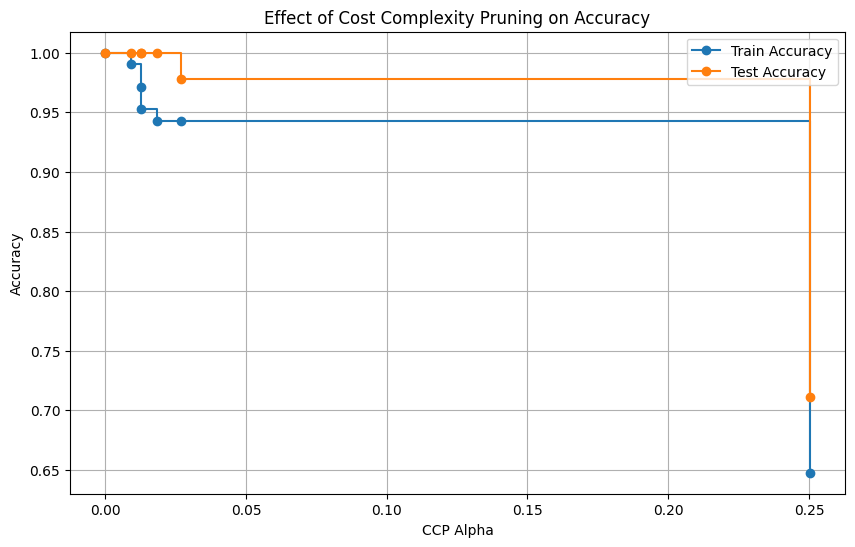

In [ ]:
# * Write a Python program to train a Decision Tree Classifier, apply Cost Complexity Pruning (CCP), and visualize its effect on accuracy *

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train initial tree to get effective alphas
clf = DecisionTreeClassifier(random_state=42)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas[:-1]  # exclude the maximum alpha that prunes the tree to a root
clfs = []

# Train a tree for each alpha
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

# Measure accuracy for each alpha
train_scores = [accuracy_score(y_train, clf.predict(X_train)) for clf in clfs]
test_scores = [accuracy_score(y_test, clf.predict(X_test)) for clf in clfs]

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, train_scores, marker='o', label='Train Accuracy', drawstyle="steps-post")
plt.plot(ccp_alphas, test_scores, marker='o', label='Test Accuracy', drawstyle="steps-post")
plt.xlabel("CCP Alpha")
plt.ylabel("Accuracy")
plt.title("Effect of Cost Complexity Pruning on Accuracy")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# * Write a Python program to train a Decision Tree Classifier and evaluate its performance using Precision, Recall, and F1-Score *

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict on test set
y_pred = clf.predict(X_test)

# Evaluate using Precision, Recall, and F1-Score
report = classification_report(y_test, y_pred, target_names=iris.target_names)
print("Classification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



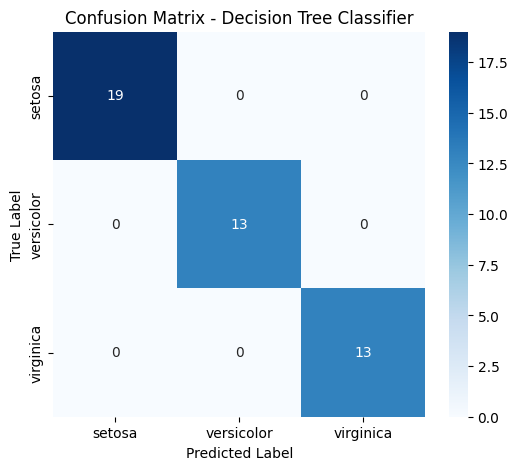

In [ ]:
# * Write a Python program to train a Decision Tree Classifier and visualize the confusion matrix using seaborn *

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict on test set
y_pred = clf.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using seaborn
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Decision Tree Classifier')
plt.show()


In [ ]:
# * Write a Python program to train a Decision Tree Classifier and use GridSearchCV to find the optimal values for max_depth and min_samples_split. *

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define parameter grid
param_grid = {
    'max_depth': [2, 3, 4, 5, 6, None],
    'min_samples_split': [2, 5, 10]
}

# Create Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Perform Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Evaluate on test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test Set Accuracy with Best Parameters:", accuracy)


Best Parameters: {'max_depth': 4, 'min_samples_split': 10}
Test Set Accuracy with Best Parameters: 1.0
